<a href="https://colab.research.google.com/github/yanil-03/python/blob/main/Linkedin_reviews_project(TextBlob).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Text =
# "I love python"
# "python is language"
# "python is use for coding"

# text conversion into Vectors

# i love python is language use for coding
# [1110000]
# [00111000]     ------> vectors --> polarity score ---> 0.1 < posititve , -0.1 > negative, 0 neutral
# [00110111]

In [5]:
df = pd.read_csv("/content/linkedin-reviews.csv")
df

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4
...,...,...
697,"Can't trust, Going to uninstall just for that ...",1
698,It really gets me linked in with my friends. H...,5
699,It lacks most of what makes the other social n...,4
700,Really disappointed in the new version. Seems ...,2


#Exploratory Data Analysis
We will start by analyzing the distributions of faings. It will provide insight into the overall sentiment of the reviews. Then we
can explore further, such as analyzing the length of reviews , and possibly derive insights from the text of the reviews.

Plotting the Distribution of Ratings

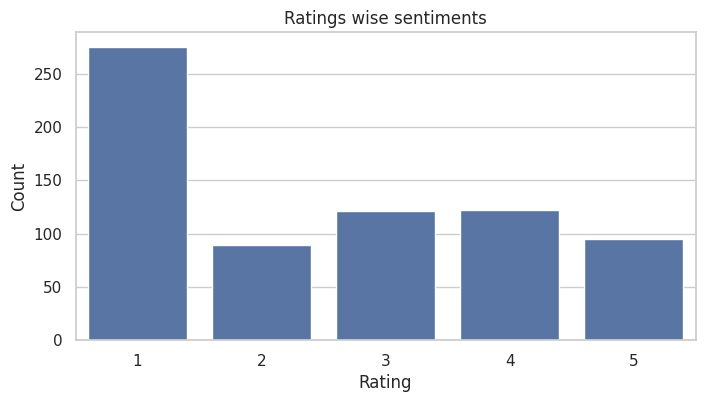

In [8]:
sns.set(style = "whitegrid")
plt.figure(figsize = (8,4))
sns.countplot(x = "Rating", data = df)
plt.title("Ratings wise sentiments")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [9]:
df.groupby("Rating").size().reset_index(name = "Candidates")

,Rating,Candidates
0,1,275
1,2,89
2,3,121
3,4,122
4,5,95


#Adding Sentiment Labels in the Data
We will use Textblob library. Textblob provides a polarity scores raning from -1(very negative) to 1(very positive) for a given text
. We can use this score to classify each review's sentiment as positive, negative or neutral.


In [11]:
!pip install textblob

In [12]:
from textblob import TextBlob

In [13]:
def textblob_sentiment_analysis(review):
  sentiment = TextBlob(review).sentiment
  if sentiment.polarity > 0.1 :
    return 'Positive'
  elif sentiment.polarity < -0.1 :
    return 'Negative'
  else :
    return 'Neutral'

In [14]:
df['Sentiment'] = df['Review'].apply(textblob_sentiment_analysis)

In [15]:
df.sample(5)

,Review,Rating,Sentiment
98,Useless app. Too little. Too late.,1,Negative
49,"OK, but no option to install to SD card",3,Positive
518,"Great new update, love it.",5,Positive
15,"Nothing special comparing to web. Please, enab...",2,Positive
343,Update to version 1.1.1 still crashes at opening,1,Neutral


#Analyzing app review sentiments

In [16]:
df['Sentiment'].value_counts()

,count
Sentiment,
Positive,298
Neutral,297
Negative,107


<Axes: ylabel='count'>

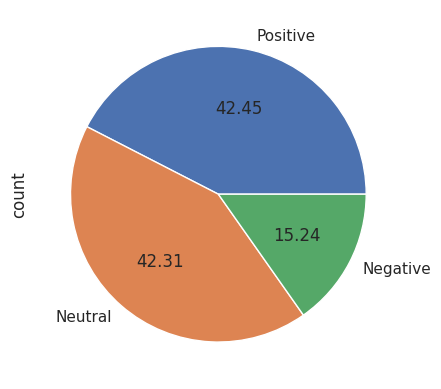

In [17]:
df['Sentiment'].value_counts().plot(kind = 'pie' , autopct = "%.2f")

#So , we can see althrough the app has low ratings , still the reviewers don't use many negative words in the reviews for the app.
Next, we'll explore the relationship between the sentiments and the ratings. This analysis can help us understand whether
there is a correlation between the sentiment of the text and numerical ratings.

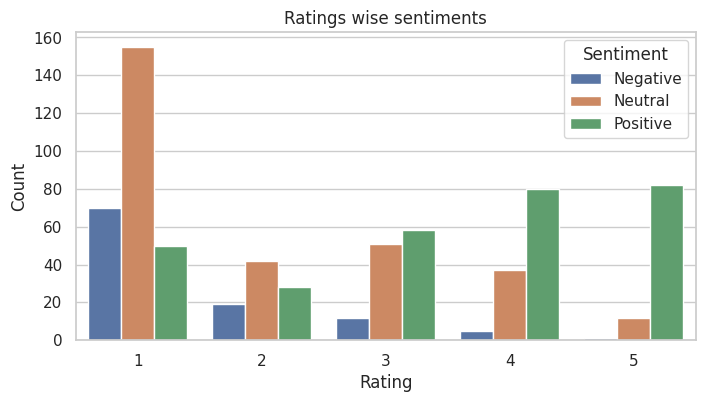

In [18]:
plt.figure(figsize = (8,4))
sns.countplot(x = "Rating", hue = "Sentiment", data = df)
plt.title("Ratings wise sentiments")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

#Summary
App Reviews Sentiment Analysis is a valuable tool for app developers and business to understand user feedback, prioritize
feature updates and maintain a positive user community. It involves using data analysis tchniques to determine whether the
sentiments in these reviews are positive , negative or neutral.